1. Data Loading

In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv("Healthcare-Diabetes.csv")
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


2. Data Cleansing

In [32]:
df.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

3. Preprocesing Data

In [33]:
#Cara 1
df_new = df.copy()
df_new = df_new[["Pregnancies",
                 "Glucose",
                 "BloodPressure",
                 "SkinThickness",
                 "Insulin",
                 "BMI",
                 "DiabetesPedigreeFunction",
                 "Age",
                 "Outcome"
                ]]

In [34]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [35]:
#Cara 2
df_new2 = df.copy()
df_new2.drop(columns=["Id"],inplace=True)

In [36]:
df_new2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


4. Explorasi Data Analitik (EDA)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns 

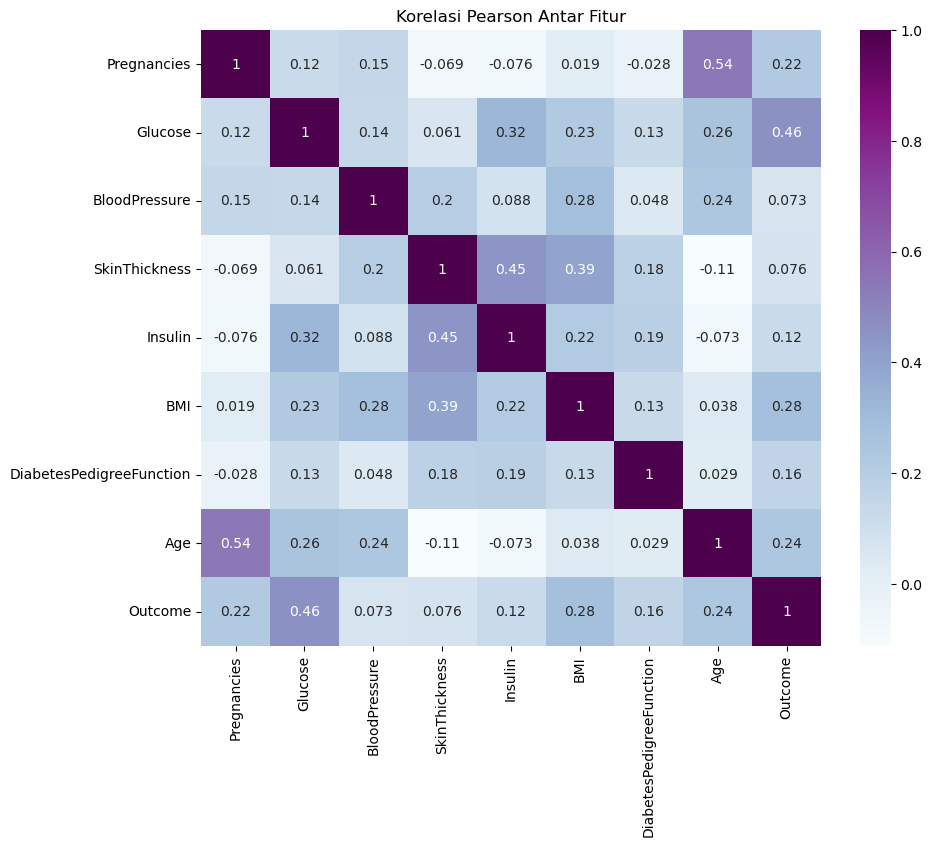

In [38]:
#korelasi pearson
plt.figure(figsize=(10,8))
sns.heatmap(df_new2.corr(),annot=True, cmap="BuPu")
plt.title("Korelasi Pearson Antar Fitur")
plt.show()

In [39]:
df_new2["Outcome"].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

5. Pelatihan dan Pengujian Model

outcome 1 --> Diabet

outcome 0 --> Tidak Diabet

In [40]:
X = df_new2.drop(columns=["Outcome"])
y = df_new2["Outcome"]

In [41]:
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [42]:
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

5.1 Pelatihan Machine Learning

In [43]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
#melakukan pelatihan dan pengujian 80:20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
#melakukan pelatihan dan pengujian 70:30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
#melakukan pelatihan dan pengujian 60:40
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X, y, test_size=0.4, random_state=42)

5.2 Memanggil Model KNN

80:20

In [47]:
#memanggil model
model_knn = KNeighborsClassifier(n_neighbors=5)
#melatih model
model_knn.fit(X_train_80, y_train_80)

KNeighborsClassifier()

In [48]:
#melakukan pelatihan pada data latih 
y_pred_train_KNN = model_knn.predict(X_train_80)

In [49]:
#melakukan pengujian pada data uji
#menguji model
y_pred_test_KNN = model_knn.predict(X_test_20)

In [50]:
#evaluasi model
#akurasi
print("Akurasi Model KNN (Testing): ", accuracy_score(y_test_20,y_pred_test_KNN)*100)
print("Akurasi Model KNN (Training): ", accuracy_score(y_train_80,y_pred_train_KNN)*100)

Akurasi Model KNN (Testing):  86.46209386281588
Akurasi Model KNN (Training):  95.34778681120144


In [51]:
print("Klasifikasi Report KNN (Testing)")
print(classification_report(y_test_20,y_pred_test_KNN))

Klasifikasi Report KNN (Testing)
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       367
           1       0.79      0.82      0.80       187

    accuracy                           0.86       554
   macro avg       0.85      0.85      0.85       554
weighted avg       0.87      0.86      0.87       554



In [52]:
print("Klasifikasi Report KNN (Training)")
print(classification_report(y_train_80,y_pred_train_KNN))

Klasifikasi Report KNN (Training)
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1449
           1       0.93      0.93      0.93       765

    accuracy                           0.95      2214
   macro avg       0.95      0.95      0.95      2214
weighted avg       0.95      0.95      0.95      2214



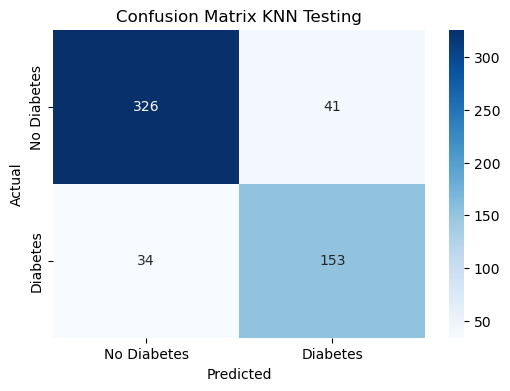

In [53]:
#Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_20, y_pred_test_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Testing")
plt.show()

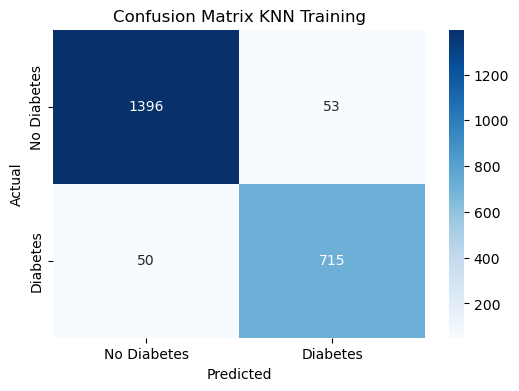

In [54]:
#Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train_80, y_pred_train_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Training")
plt.show()

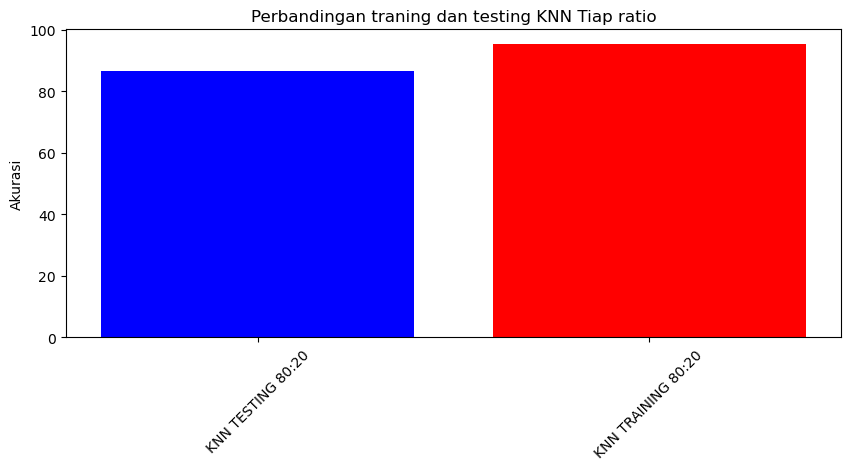

In [55]:
akurasi8020KNN_testing = accuracy_score(y_test_20,y_pred_test_KNN)*100
akurasi8020KNN_training = accuracy_score(y_train_80,y_pred_train_KNN)*100

#bikin visualisasi data
plt.figure(figsize=(10,4))
models = ["KNN TESTING 80:20","KNN TRAINING 80:20"]
akurasi = [akurasi8020KNN_testing,akurasi8020KNN_training]
warna=["blue","red"]
plt.bar(models,akurasi,color=warna)
plt.ylabel("Akurasi")

plt.title("Perbandingan traning dan testing KNN Tiap ratio")
plt.xticks(rotation=45)
plt.show()

70:30

In [56]:
model_knn_7030 = KNeighborsClassifier(n_neighbors=5)

In [57]:
model_knn_7030.fit(X_train_70,y_train_70)

KNeighborsClassifier()

In [58]:
y_pred_train_KNN_7030 = model_knn_7030.predict(X_train_70)

In [59]:
y_pred_test_KNN_7030 = model_knn_7030.predict(X_test_30)

In [60]:
print("Akurasi Pelatihan KNN 70 30: ", accuracy_score(y_train_70, y_pred_train_KNN_7030)*100)

Akurasi Pelatihan KNN 70 30:  93.44346928239545


In [61]:
print("Akurasi Pengujian KNN 70 30: ", accuracy_score(y_test_30, y_pred_test_KNN_7030)*100)

Akurasi Pengujian KNN 70 30:  84.47653429602889


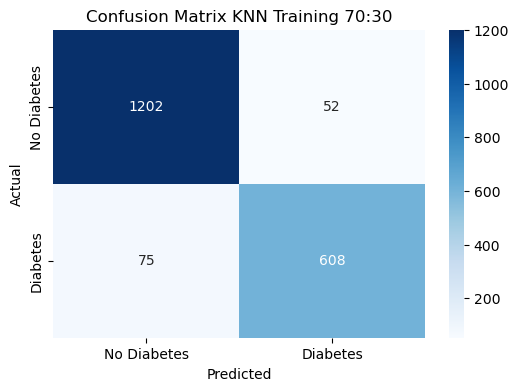

In [62]:
#Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train_70, y_pred_train_KNN_7030), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Training 70:30")
plt.show()

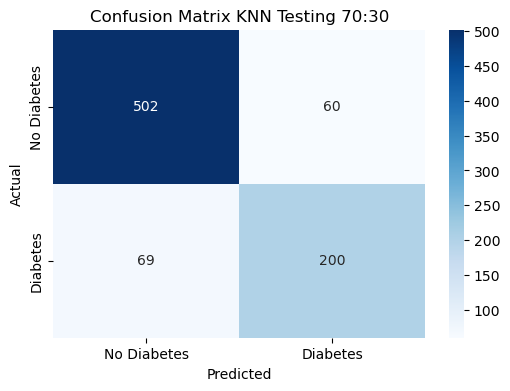

In [63]:
#Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_30, y_pred_test_KNN_7030), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Testing 70:30")
plt.show()

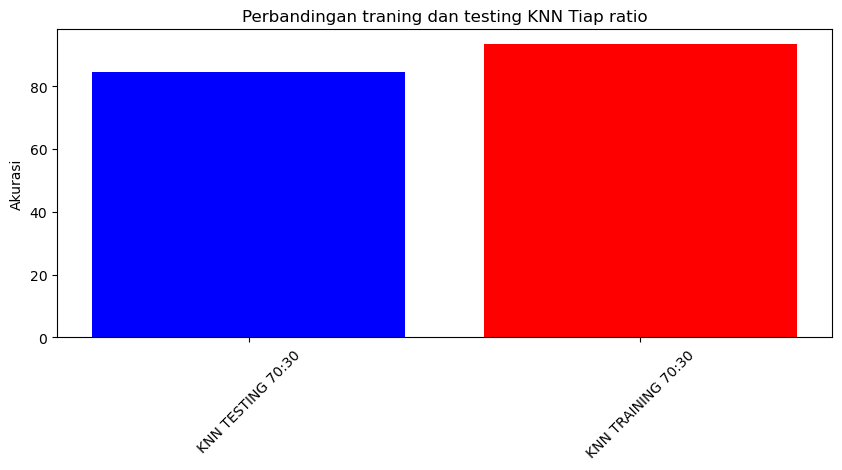

In [64]:
akurasi7030KNN_testing = accuracy_score(y_test_30,y_pred_test_KNN_7030)*100
akurasi7030KNN_training = accuracy_score(y_train_70,y_pred_train_KNN_7030)*100

#bikin visualisasi data
plt.figure(figsize=(10,4))
models = ["KNN TESTING 70:30","KNN TRAINING 70:30"]
akurasi = [akurasi7030KNN_testing,akurasi7030KNN_training]
warna=["blue","red"]
plt.bar(models,akurasi,color=warna)
plt.ylabel("Akurasi")

plt.title("Perbandingan traning dan testing KNN Tiap ratio")
plt.xticks(rotation=45)
plt.show()

60:40

In [67]:
model_knn_6040 = KNeighborsClassifier(n_neighbors=5)

In [68]:
model_knn_6040.fit(X_train_60,y_train_60)

KNeighborsClassifier()

In [69]:
y_pred_train_KNN_6040 = model_knn_6040.predict(X_train_60)

In [70]:
y_pred_test_KNN_6040 = model_knn_6040.predict(X_test_40)

In [71]:
print("Akurasi Pelatihan KNN 60 40: ", accuracy_score(y_train_60, y_pred_train_KNN_6040)*100)

Akurasi Pelatihan KNN 60 40:  91.32530120481928


In [72]:
print("Akurasi Pengujian KNN 60 40: ", accuracy_score(y_test_40, y_pred_test_KNN_6040)*100)

Akurasi Pengujian KNN 60 40:  82.76173285198556


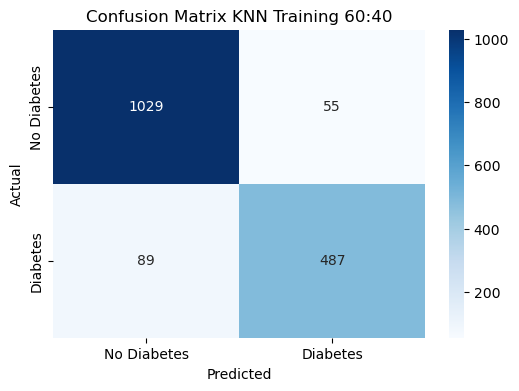

In [73]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train_60, y_pred_train_KNN_6040), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Training 60:40")
plt.show()

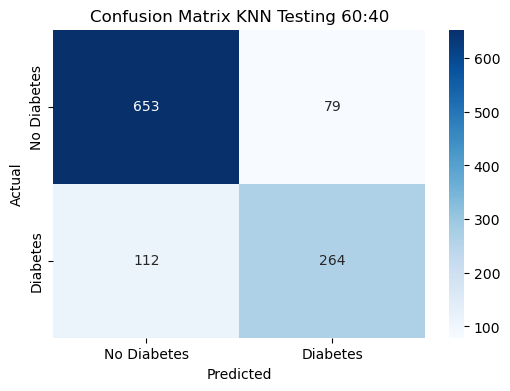

In [74]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_40, y_pred_test_KNN_6040), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Testing 60:40")
plt.show()

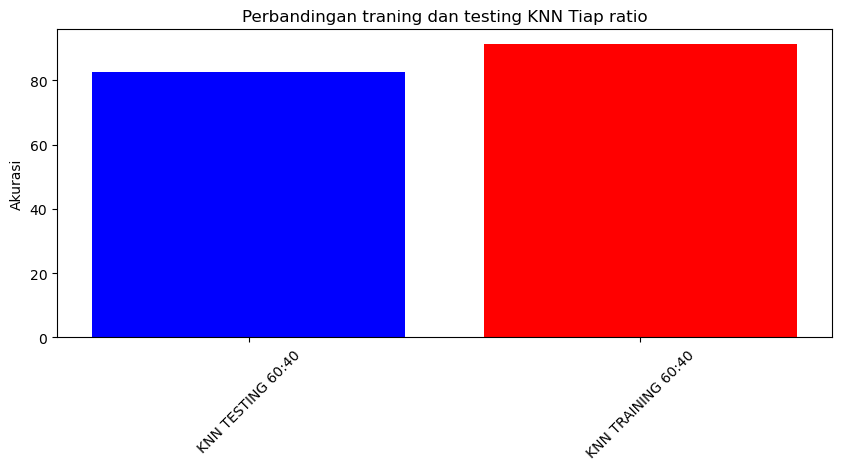

In [75]:
akurasi6040KNN_testing = accuracy_score(y_test_40,y_pred_test_KNN_6040)*100
akurasi6040KNN_training = accuracy_score(y_train_60,y_pred_train_KNN_6040)*100

#bikin visualisasi data
plt.figure(figsize=(10,4))
models = ["KNN TESTING 60:40","KNN TRAINING 60:40"]
akurasi = [akurasi6040KNN_testing,akurasi6040KNN_training]
warna=["blue","red"]
plt.bar(models,akurasi,color=warna)
plt.ylabel("Akurasi")

plt.title("Perbandingan traning dan testing KNN Tiap ratio")
plt.xticks(rotation=45)
plt.show()

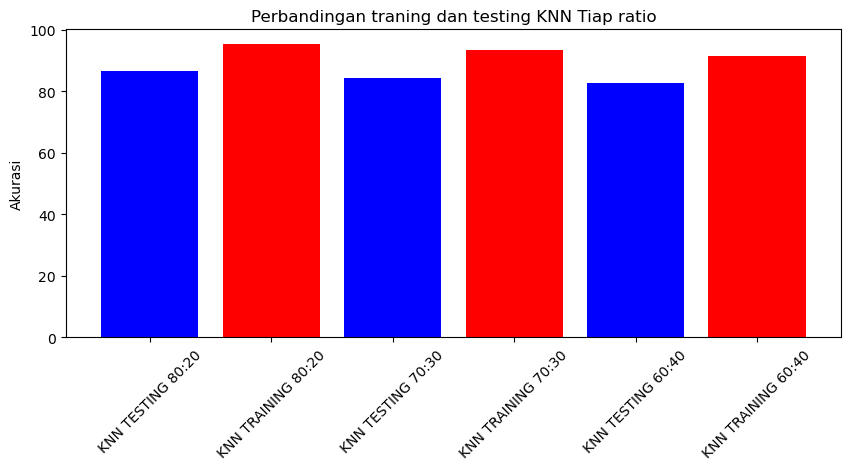

In [76]:
#bikin visualisasi data
plt.figure(figsize=(10,4))
models = ["KNN TESTING 80:20","KNN TRAINING 80:20","KNN TESTING 70:30","KNN TRAINING 70:30","KNN TESTING 60:40","KNN TRAINING 60:40"]
akurasi = [akurasi8020KNN_testing,akurasi8020KNN_training,akurasi7030KNN_testing,akurasi7030KNN_training,akurasi6040KNN_testing,akurasi6040KNN_training]
warna=["blue","red"]
plt.bar(models,akurasi,color=warna)
plt.ylabel("Akurasi")

plt.title("Perbandingan traning dan testing KNN Tiap ratio")
plt.xticks(rotation=45)
plt.show()

Model terbaik KNN ada pada rasio 80:20. Dibuktikan dengan hasi dari akurasi pelatihan memiliki nilai tertinggi yaitu diangka 95% dan di pengujian sebesar 86%. Hal ini menunjukkan bahwa model KNN dengan rasio 80:20 memiliki keunggulan dari rasio lainnya. Hal tersebut didukung dengan confusion matrix yang menyatakan bahwa

5.3 Memanggil Model Naive Bayes

Naive Bayes 80:20

In [80]:
from sklearn.naive_bayes import GaussianNB

#memanggil model
model_nb = GaussianNB()

#melatih model
model_nb.fit(X_train_80, y_train_80)

#melakukan pengujian model
y_pred_nb = model_nb.predict(X_test_20)

In [81]:
print("Akurasi Naive Bayes nya adalah: ", accuracy_score(y_test_20,y_pred_nb))

Akurasi Naive Bayes nya adalah:  0.7689530685920578


In [82]:
print(classification_report(y_test_20,y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       367
           1       0.68      0.59      0.63       187

    accuracy                           0.77       554
   macro avg       0.74      0.73      0.73       554
weighted avg       0.76      0.77      0.76       554



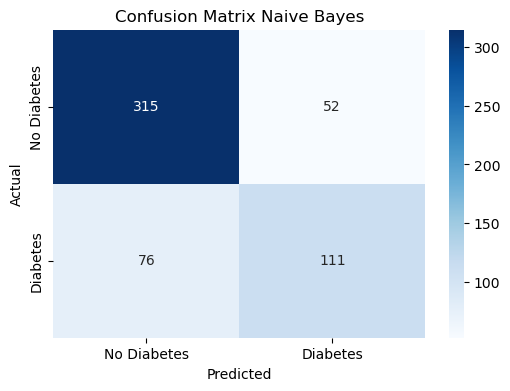

In [83]:
#Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_20, y_pred_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Naive Bayes")
plt.show()

Naive Bayes 70:30

In [86]:
model_nb.fit(X_train_70, y_train_70)
y_pred_nb = model_nb.predict(X_test_30)

In [87]:
print("Akurasi Naive Bayes nya adalah: ", accuracy_score(y_test_30,y_pred_nb))

Akurasi Naive Bayes nya adalah:  0.7773766546329723


In [88]:
print(classification_report(y_test_30,y_pred_nb))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       562
           1       0.68      0.60      0.64       269

    accuracy                           0.78       831
   macro avg       0.75      0.73      0.74       831
weighted avg       0.77      0.78      0.77       831



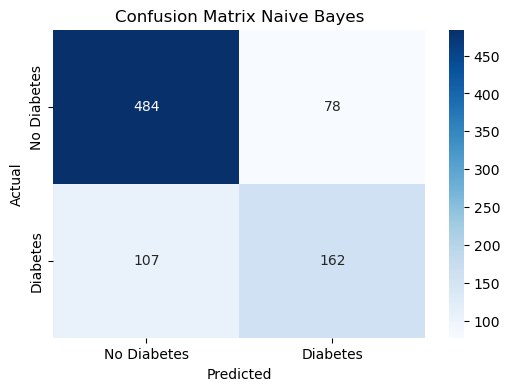

In [89]:
#Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_30, y_pred_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Naive Bayes")
plt.show()

60:40

In [90]:
model_nb.fit(X_train_60, y_train_60)
y_pred_nb = model_nb.predict(X_test_40)

In [91]:
print("Akurasi Naive Bayes nya adalah: ", accuracy_score(y_test_40,y_pred_nb))

Akurasi Naive Bayes nya adalah:  0.7716606498194946


In [92]:
print(classification_report(y_test_40,y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       732
           1       0.69      0.60      0.64       376

    accuracy                           0.77      1108
   macro avg       0.75      0.73      0.74      1108
weighted avg       0.77      0.77      0.77      1108



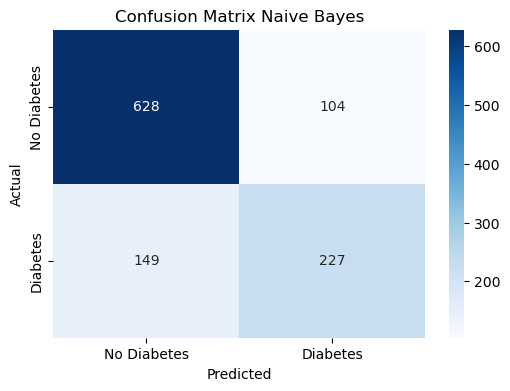

In [93]:
#Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_40, y_pred_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Naive Bayes")
plt.show()